## MATH2231 Discrete Mathematics with Computation
## Computer exercise 3
**Date:** 23 March 2019

**Submit by:** 30 March 2019 at 1:00pm on [Upload assignment](https://minerva.leeds.ac.uk/webapps/assignment/uploadAssignment?content_id=_6236974_1&course_id=_478400_1&group_id=&mode=view)

**Name:** Samuel Kettlewell

**Username:** ll16sjk

### Instructions
1. Write your answers in the empty cells after each question.
1. Please **add comments** when requested. You will not get a full mark if comments are missing.
1. Click `Run` in the Toolbar to run the code in the cell you are currently working on.
1. Before submitting, please: (a) check that you have run the code in each cell, and (b) click on the save icon.
1. Upload this notebook on Minerva by the deadline.
1. Please note that **only code saved in this notebook is accepted as submission**. Any other type of file will be discarded.
1. You **may not import any module** unless explicitly instructed to do so.

We are going to represent our graph as ***vertex and edge lists***, that is as a ***pair of lists*** $(V,E)$,
where $V$ is a list of distinct characters and $E$ is a list of pairs of elements of $V$.

This is different from the previous Computer Exercises in which we used adjacency lists for our graphs.
Having a distinct list for the edges is useful for defining weight functions.

#### Graph Representation
For instance:
```python
V = ['a','b','c','d']
E = [(V[0],V[1]),(V[0],V[2]),(V[0],V[3]),(V[1],V[3])]
G = (V,E)
```

#### Weight Function
In Python, we represent the weight function as a **dictionary** `{E[0] : w0, E[1] : w1, ...}`, where `w0` is the weight assigned to edge `E[0]`.

For instance:
```python
mu = {E[0]: 2,
      E[1]: 1,
      E[2]: 4,
      E[3]: 2}
```

## Exercise 1

In this exercise you will implement Kruskal's algorithm for finding a minimal connector of a connected graph.

**(a)** Define a function `findEdgeOfMinimalWeight(mu,E)` that takes a weight function `mu` and a list of edges `E`, and returns any edge in `E` which has minimal weight.

Ensure your function returns something indicating an error if the edge set is empty.

Test your function by printing the output for:
```python
V = ['a','b','c','d','e','f']
E = [(V[0],V[1]),  (V[0],V[2]),  (V[0],V[3]),
     (V[1],V[3]),  (V[1],V[4]),
     (V[2],V[4]),  (V[4],V[5])]
mu = {E[0]: 2, E[1]: 1, E[2]: 4, E[3]: 2, E[4]: 3, E[5]: 3, E[6]: 1}
```

In [1]:
#Define the lists and dictionaries corresponding to the vertcies, edges and weight function.
V = ['a','b','c','d','e','f']
E = [(V[0],V[1]),  (V[0],V[2]),  (V[0],V[3]),
     (V[1],V[3]),  (V[1],V[4]),
     (V[2],V[4]),  (V[4],V[5])]
mu = {E[0]: 2, E[1]: 1, E[2]: 4, E[3]: 2, E[4]: 3, E[5]: 3, E[6]: 1}


def findEdgeOfMinimalWeight(mu, E):
    #If the edge set is empty then there is no edge of minimal weight.
    if len(E) == 0:
        print("Error: Edge Set Empty")
        return []
    
    #Obtain a list of edges and a list of weights from the dictionary representing the weight function. 
    weights = [each_weight for each_weight in mu.values()]

    #Find the minimal weight of all edges in the graph.
    min_weight = min(weights)
    
    #Iterate through all the edges, if any edge has weight equal to min_weight then append that edge to the list
    minimal_edges = []
    for corresponding_edges in enumerate(weights):
        if corresponding_edges[1] == min_weight:
            minimal_edges.append(E[corresponding_edges[0]])
    
    #Return the list of minimal edges.
    return minimal_edges

#Find the minimal edges of the graph defined above.
findEdgeOfMinimalWeight(mu, E)

[('a', 'c'), ('e', 'f')]

**(b)** Define a recursive function `doesPathExistBetweenVertices(u,v, V, E)` that takes two vertices `u` and `v`, a vertex/edge pair of lists `V` and `E`, and returns `True` or `False` depening on whether a path from `u` to `v` can be formed by the edges in `E`.

Recall that you developed the function `canReachA(GA,i,j,visited)` in Computer Exercises 2.
Feel free to reuse this function however remember that `canReachA` expectes a dictionary representing an adjacency list,
so either adapt the method to the list representation or make your `doesPathExistBetweenVertices` function convert `(V,E)` to an adjacency list representation.

Test your function on the graph from part (a) by testing whether you can reach $f$ from $a$. Test it again this time removing edge $ac$ from $E$, then test again after removing $ef$ from $E$.

In [2]:
def doesPathExistBetweenVertices(u, v, V, E, visited = None):
    #For the very first case, if the visited argument is None, it is the 'parent' call of the function so start with an empty list.
    if visited is None:
        visited = []
    
    #If u and v are the same vertex then there is a (trivial) path from u to v and vice versa.
    if u == v:
        return True
    
    #If we have already visited vertex i, then we must have looped back on ourselves and found all the vertices in this connected component.
    if u in visited:
        return False

    #If we reach this point in the code it means i is a 'new'/unvisited vertex, so add it to the visited list
    visited.append(u)

    #Create a list of vertices adjacent to u. - I chose not to use list comprehension for readability.
    u_adj_vertices = []
    for each_edge in E:
        if u in each_edge:
            u_pos = each_edge.index(u)
            if u_pos == 1:
                u_adj_vertices.append(each_edge[0])
            elif u_pos == 0:
                u_adj_vertices.append(each_edge[1])
    
    #Iterate through the vertices adjacent to u and recursively call the function to check whether we can reach
    for vertex in u_adj_vertices:
        if doesPathExistBetweenVertices(vertex, v, V, E, visited):
            return True

    #If we reach this point in the code, then we can't reach u from v (or vice versa) so there exists no path between them.
    return False

#Redefine the edge list - Just to be sure
E = [(V[0],V[1]),  (V[0],V[2]),  (V[0],V[3]),
     (V[1],V[3]),  (V[1],V[4]),
     (V[2],V[4]),  (V[4],V[5])]

#We expect this to return True since we could get from a to f by: a -> c -> e -> f
print(doesPathExistBetweenVertices('a', 'f', V, E))

#We also test it works both ways, that is, it can recognise the reverse path from f to a also
print(doesPathExistBetweenVertices('f', 'a', V, E))

#We expect this to return True also since we could get from a to f -also- by: a -> b -> e -> f
E.remove(('a', 'c'))
print(doesPathExistBetweenVertices('a', 'f', V, E))

#We expect this to return False since the only way to reach f is going through e and the edge ef has been removed
E.remove(('e', 'f'))
print(doesPathExistBetweenVertices('a', 'f', V, E))

#Redefine it for use in later questions to makre sure it doesn't mess up!
E = [(V[0],V[1]),  (V[0],V[2]),  (V[0],V[3]),
     (V[1],V[3]),  (V[1],V[4]),
     (V[2],V[4]),  (V[4],V[5])]

True
True
True
False


**(c)** Define a function `Kruskal(V, E, mu, Edges)` that takes the lists `V` and `E` of a graph, a weight function `mu` and a list of edges `Edges`, and returns a minimal connector for $G = (V,E)$.

The idea is that `Kruskal` performs the $i^{\mathrm{th}}$ step in the algorithm from the lectures, `Edges` should contain all the previous edge choices $e_1,\dots,e_{i - 1}$, so it should return `Edges` along with an additional choice, and your initial call to it will pass an empty list of `Edges`.

Make use of recursion in your code, for instance try something of the form
```python
def Kruskal(V, E, mu, Edges):
    Let i be the length of Edges
    Let n the number of vertices
    
    if i == n - 1:
        Finished
    
    #  Let EE be the subset of E such that
    #  introducing an element of EE does not
    #  introduce a cycle
    EE = [e for e in E if ...]
    
    Let edge be the edge of EE of minimal weight
    
    #Possibly return a message in the case where no edge
    #  can be found, to help with debugging
    
    #Add edge to Edges and remove edge from E
    # Be mindful of not editing E itself,
    # as that could cause side effects outside
    # the function, instead create a copy
    
    #Call Kruskal recursive with E smaller by one
    # and Edges bigger by one,
    # and return the result
```
Add brief comments explaining your code.

To determine which edges to include in EE think about what what has to be true in `Edges`
for an edge in `E` to introduce a cycle.

Test the function works on the graph and weight function defined in part (a).

In [3]:
def Kruskal(V, E, mu, Edges = []):
    #If there are no edges left in E, return the Edges list calculated recursively.
    if len(E) == 0:
        return Edges
    
    #Obtain a list of the edges of minimal weight using the function defined above.
    min_weight_edges = findEdgeOfMinimalWeight(mu, E)
    
    #Iterate through the edges of minimal weight, if there isn't already a path between the two vertices in each edge
    #from the list of Edges already calculated, (i.e. introducing this path won't introduce a cycle) then append the
    #edge to Edges set.
    for each_edge in min_weight_edges:
        if not doesPathExistBetweenVertices(each_edge[0], each_edge[1], V, Edges):
            Edges.append((each_edge[0], each_edge[1]))
    
    #Create a copy of the edge list and weight function so as not to mess up global variables.
    E_copy = [x for x in E if x not in min_weight_edges]
    mu_copy = {x: mu[x] for x in mu.keys() if x in E_copy}
    
    #Recursively call Kruskal with the Edges calculated in this step.
    return Kruskal(V, E_copy, mu_copy, Edges)

Kruskal(V, E, mu)

[('a', 'c'), ('e', 'f'), ('a', 'b'), ('b', 'd'), ('b', 'e')]

**(d)** Use the plotting functions from Practical 2 to print out the graphs used above, that is print out $(V,E)$, and the minimal connector found by Kruskal's algorithm.

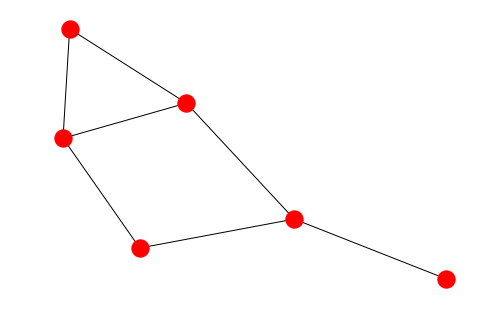

In [13]:
#I will assume this in an explicit instruction (since it's in practical 2) to import the networkx module (so as not to violate the rules.)
import networkx as nx

def drawGraph(V, E):
    G = nx.Graph()
    G.add_nodes_from(V)
    G.add_edges_from(E)
    nx.draw(G)
    
    return None

#Draw the graph G=(V,E)
drawGraph(V, E)

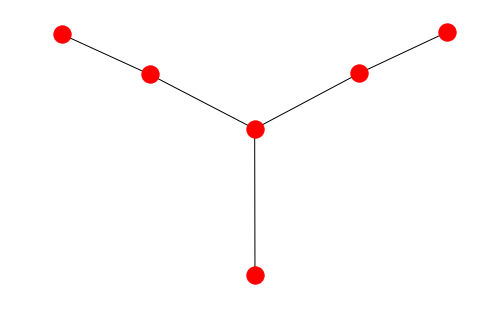

In [5]:
#Draw the graph H=(V,E) - The minimal spanning tree produced by Kruskal's algorithm
drawGraph(V, Kruskal(V, E, mu))

## Exercise 2

In this exercise you will implement Dijkstra's algorithm to find the lowest possible weight of a path between two vertices.

**(a)** Define a function `findVertexOfMinimalWeight(L,V)` as an analogue of the `findEdgeOfMinimalWeight` function from the last exercise.

Use the graph from the previous exercise and the following (vertex) weight function to test it
```python
L = {V[0]: 3,
     V[1]: 7,
     V[2]: 8,
     V[3]: 2,
     V[4]: 14,
     V[5]: 7}
```

Change `L[V[2]]` to 1 and retest your function.

In [6]:
#Define the vertex weight function
L = {V[0]: 3,
     V[1]: 7,
     V[2]: 8,
     V[3]: 2,
     V[4]: 14,
     V[5]: 7}


def findVertexOfMinimalWeight(L, V):
    #This clause removes any extra vertices from the dictionary. Only those in V get scanned for minimality. Necessary for 2b
    if len(L) != len(V):
        dict_vertices_to_remove = [v for v in L.keys() if v not in V]
        for each_vertex_to_remove in dict_vertices_to_remove:
            del L[each_vertex_to_remove]
    
    #Obtain the weights of each vertex from the dictionary L
    vertex_weights = [weight for weight in L.values()]
    
    #Find the minimal weight of all the vertices
    min_weight = min(vertex_weights)
    
    #Iterate back through each element of the dictionary, if any element has weight equal to min_weight, add it to the list
    minimal_weights = []
    for each_vertex, each_weight in L.items():
        if each_weight == min_weight:
            minimal_weights.append(each_vertex)
    
    #Return the list of minimal weights
    return minimal_weights

#Test it produces the correct result - We expect 'd'
print(findVertexOfMinimalWeight(L, V))

#We now expect 'c'
L[V[2]] = 1
print(findVertexOfMinimalWeight(L, V))

['d']
['c']


**(b)** Implement Dijkstra's algorithm from Tutorial 4 for finding the smallest weight of a path between two vertices.

Your function should be of the form `Dijkstra(V,E,mu, a,z)` where `V,E,mu` are as above and `a,z` are vertices.

Then test your function on the graph and weight function from the previous exercise and find the cost of the cheapest path from $c$ to $d$.

In [7]:
def Dijkstra(V, E, mu, a, z):
    #Define a dictionary containing the vertices and their corresponding 'weights'/distances from each other.
    L = {vertex: float('inf') for vertex, weight in zip(V, range(len(V)))}
    
    L[a] = 0 #We begin at vertex a, set this weight/distance 0.
    
    S = [] #Define a list of unvisited vertices.
    
    #While the target vertex is unvisited, we remain in this loop.
    while z not in S:
        not_S = [x for x in V if x not in S] #Produce a list of all unvisited vertices. That is,  all v in V which aren't in S
        u = findVertexOfMinimalWeight(L, not_S) #Find the unvisited vertex with the minimal weight
        
        #Rather than extend, in case there's more than one equidistant vertex.
        #Just deal with the first one here and let the loop take care of the rest.
        S.append(u[0])

        not_S = [x for x in V if x not in S] #Reproduuce the list of unvisited vertices again
        
        #Iterate over the unvisited vertices
        for v in not_S:
            u = u[0] #Unpack the vertex from the list.
            
            #If the edge (u, v) is in the graph
            if (u, v) in E:
                
                #If the distance to vertex v by this path is less than the current distance stored in L, replace the L value with this distance.
                if L[u] + mu[(u, v)] < L[v]:
                    L[v] = L[u] + mu[(u, v)]
              
            #If the edge (v, u) is in the graph
            elif (v, u) in E:
                
                #If the distance to vertex v by this path is less than the current distance stored in L, replace the L value with this distance.
                if L[u] + mu[(v, u)] < L[v]:
                    L[v] = L[u] + mu[(v, u)]
    
    #Return the weight of the smallest possible weighted path from a->z
    return L[z]

#Test the function returns what we expect: we expect the minimal path c -> d to have length 5.
Dijkstra(V, E, mu, 'c', 'd')

5

**(c)**
Print out a table showing the cheapest paths from every vertex to every other vertex.

Your code should be in the form of a function of the form `printCosts(V,E,mu)` that is flexible enough to work over any graph.

Comment about anything you notice about the table, for instance: symmetry, diagonal values, try to explain these features.

In [8]:
def printCosts(V, E, mu):
    #Define a matrix to store the 'tabulated' data
    matrix = [[] for i in range(len(V))]

    #Iterate over each vertex in V twice over (effectively produce V x V (cartesian product))
    for each_vertex in V:
        for each_vertex_2 in V:
            
            #Calculate the minimal distance between vertices each_vertex and each_vertex_2 using the function above.
            cost = Dijkstra(V, E, mu, each_vertex, each_vertex_2)
            
            #Add to the appropriate row of the matrix the minimal distance previously calculated
            matrix[V.index(each_vertex)].append(cost)
            
            #Stylise and print the minimal distance between every two vertices on the graph.
            print(str(each_vertex) + "->" + str(each_vertex_2) + ": " + str(cost))
        
        print("") #Newline
        
    return matrix

#Print the cheapest path from every vertex to every other vertex for the graph defined above.
print(printCosts(V, E, mu))

"""If I could figure out how to tabulate the data in a presentable fashion. We should obsersve symmetry about the main diagonal 
since the shortest path from b->a is also the shorted path a->b. The diagonal values are all 0 trivially because they correspond
to the distance between a vertex and itself which is 0."""

a->a: 0
a->b: 2
a->c: 1
a->d: 4
a->e: 4
a->f: 5

b->a: 2
b->b: 0
b->c: 3
b->d: 2
b->e: 3
b->f: 4

c->a: 1
c->b: 3
c->c: 0
c->d: 5
c->e: 3
c->f: 4

d->a: 4
d->b: 2
d->c: 5
d->d: 0
d->e: 5
d->f: 6

e->a: 4
e->b: 3
e->c: 3
e->d: 5
e->e: 0
e->f: 1

f->a: 5
f->b: 4
f->c: 4
f->d: 6
f->e: 1
f->f: 0

[[0, 2, 1, 4, 4, 5], [2, 0, 3, 2, 3, 4], [1, 3, 0, 5, 3, 4], [4, 2, 5, 0, 5, 6], [4, 3, 3, 5, 0, 1], [5, 4, 4, 6, 1, 0]]


'If I could figure out how to tabulate the data in a presentable fashion. We should obsersve symmetry about the main diagonal \nsince the shortest path from b->a is also the shorted path a->b. The diagonal values are all 0 trivially because they correspond\nto the distance between a vertex and itself which is 0.'

## Exercise 3

In this exercise you will develop function to generate all graphs on $n$ vertices and functions to refine your list to exclude isomorphic and disconnected graphs.

**(a)** Create a function `generateAllGraphs(V)` that creates all graphs on vertex set `V`.

Recall that the edge set of a graph is a subset $V^{\{2\}} = \{S \subseteq V \colon |S| = 2\}$,
so the set of all graphs is in one-one correspondence with the set of all subsets of $V^{\{2\}}$.

Your function should return a pair `(V,E)` where `E` is the edge list.

Test it by generating all graphs on 4, and then 5 vertices.
Why would it not be a good idea to test it on 6 or 7 vertices?

In [9]:
#We reimplement the subsets of size k function from Exercises 1 modifying it slightly to accept lists instead of integers.
def subsets_k(edge_list, k):
    #If k = 0 then the only subset is the empty set.
    if k == 0:
        return [[]]
    
    #If the edge list is empty then there are no subsets.
    if len(edge_list) == 0:
        return []
    
    #Take a slice of edge_list, remove the first element
    edge_list_slice = edge_list[1:]
    
    #Recursively call subsets
    subsets = subsets_k(edge_list_slice, k-1)
    
    #Iterate through the above subsets and add the first element back to them (divide and conquer strategy)
    for each_subset in subsets:
        each_subset.append(edge_list[0])
        
    #Return the concatenation of the supsets calculated in this step and the recursive call to the next step.
    return subsets + subsets_k(edge_list_slice, k)




"""Unfortunately, because I have no idea what 'your function should return a pair (V, E) means' (recursion?). I will have to
tackle this problem slightly differently and accept losing some marks."""
def generateAllGraphs(V): 
    #Step 1 - We wish to generate a list of all possible edges.
    edges = []
    
    #Iterate through the vertex list twice over (effectively produce the Cartesian product)
    for v1 in V:
        for v2 in V:
            
            #Since there exists no edge between a vertex and itself we rule this case out
            if v1 != v2:
                
                #Since we do not want both (u, v) and (v, u) for vertices u,v to be included in the edge list we rule this case out.
                if V.index(v1) < V.index(v2):
                    edges.append((v1, v2)) #Append the edge to the edge list
        
        
    #Step 2 - We wish to generate a list of all possible combinations of these edges (inc. those of different lengths).
    edge_combinations = []
    
    #Iterate through the range {0, 1, 2, ..., n} as we want to find all combinaions of the edge set above with each of those lengths.
    for n in range(len(V)+1):
        
        #Using the subsets_k function defined above, calculate all combinations of length n.
        edge_combinations.extend(subsets_k(edges, n))
    
    #Using list comprehension, return a list containing tuples (V, E) where E is the edge set of the every graph upto n vertices.
    return [(V, edge_combinations[n]) for n in range(len(edge_combinations))]


#We test the function behaves as we want it to. It's a bit difficult to see but it is correct.
print(generateAllGraphs(['a', 'b', 'c', 'd']))
print("")
print(len(generateAllGraphs(['a', 'b', 'c', 'd', 'e'])))


#For n vertices, there are exactly 2^(n(n-1)/2) graphs. This is why we shouldn't test it with 6 or 7 vertices.

[(['a', 'b', 'c', 'd'], []), (['a', 'b', 'c', 'd'], [('a', 'b')]), (['a', 'b', 'c', 'd'], [('a', 'c')]), (['a', 'b', 'c', 'd'], [('a', 'd')]), (['a', 'b', 'c', 'd'], [('b', 'c')]), (['a', 'b', 'c', 'd'], [('b', 'd')]), (['a', 'b', 'c', 'd'], [('c', 'd')]), (['a', 'b', 'c', 'd'], [('a', 'c'), ('a', 'b')]), (['a', 'b', 'c', 'd'], [('a', 'd'), ('a', 'b')]), (['a', 'b', 'c', 'd'], [('b', 'c'), ('a', 'b')]), (['a', 'b', 'c', 'd'], [('b', 'd'), ('a', 'b')]), (['a', 'b', 'c', 'd'], [('c', 'd'), ('a', 'b')]), (['a', 'b', 'c', 'd'], [('a', 'd'), ('a', 'c')]), (['a', 'b', 'c', 'd'], [('b', 'c'), ('a', 'c')]), (['a', 'b', 'c', 'd'], [('b', 'd'), ('a', 'c')]), (['a', 'b', 'c', 'd'], [('c', 'd'), ('a', 'c')]), (['a', 'b', 'c', 'd'], [('b', 'c'), ('a', 'd')]), (['a', 'b', 'c', 'd'], [('b', 'd'), ('a', 'd')]), (['a', 'b', 'c', 'd'], [('c', 'd'), ('a', 'd')]), (['a', 'b', 'c', 'd'], [('b', 'd'), ('b', 'c')]), (['a', 'b', 'c', 'd'], [('c', 'd'), ('b', 'c')]), (['a', 'b', 'c', 'd'], [('c', 'd'), ('b', '

**(b)** Recall the function `isIsomorphicA(GA,HA)` from Practical 2.

Reimplement that function here so that it accepts vertex and edge lists `(V,E)` instead of adjacency lists.

In [10]:
def isIsomorphicA(G, H, f):
    
    #If the two graphs have a different number of vertices, then they are not isomorphic.
    if len(G[0]) != len(H[0]):
        return False
    
    #If the two graphs have a different number of edges, then they are not isomorphic.
    if len(G[1]) != len(H[1]):
        return False
    
    #It reamins to check that any neighbours in the preimage graph G, remain neighbours in the image graph H.
    
    #For each vertex in the vertex set of G
    for v in G[0]:
        #Obtain the image of vertex i under bijection f 
        v_index = G[0].index(v)
        v_image = G[0][f[v_index]]
        
        #Generate a list of vertices adjacent to v using a method similar to that in 1b. Not list comprehension for readability
        neighbours_of_v = []
        for each_edge in G[1]:
            if v in each_edge:
                v_pos = each_edge.index(v)
                if v_pos == 1:
                    neighbours_of_v.append(each_edge[0])
                elif v_pos == 0:
                    neighbours_of_v.append(each_edge[1])

                    
        #Loop through the neighbours of v
        for each_neighbour in neighbours_of_v:
            #Obtain the image of each neighbour under bijection f.
            neighbour_image = G[0][f[G[0].index(each_neighbour)]]
            
            #We now require that the image of the neighbour is a neighbour to the image of v.
            
            #We can check this by looking to see if the appropriate edge exists in H's edge set. If it doesn't, return False
            if (v_image, neighbour_image) not in H[1]:
                if (neighbour_image, v_image) not in H[1]:
                    return False
    
    #If we reach this point in the code, we have checked all required conditions and none are violated so it is an isomorphism.
    return True


#Define some test graphs
G = (['a', 'b', 'c', 'd'], [('a', 'b'), ('b', 'c'), ('a', 'd')])
H = (['a', 'b', 'c', 'd'], [('a', 'b'), ('b', 'c'), ('a', 'd')])
graphs = generateAllGraphs(['a', 'b', 'c'])

#Check the function behaves as we expect it to. The first two should return True, the third False.
print(isIsomorphicA(graphs[1], graphs[2], (0,2,1)))
print(isIsomorphicA(G, H, (0, 1, 2, 3)))
print(isIsomorphicA(G, H, (0, 2, 1, 3)))

True
True
False


**(c)** Recall the function `isConnectedA(GA)` from Computer Exercises 2.

Reimplement that function here so that it accepts vertex and edge lists `(V,E)` instead of an adjacency list.

In [11]:
def isConnected(G):
    #Extract the first vertex from the vertex list of G=(V, E) and place it in a list.
    first_vertex = G[0][0]
    vertices_list = [first_vertex]
    
    #Iterate through vertices_list
    for v in vertices_list:
        
        #Generate a list containing the neighbours of each vertex currently in vertices_list 
        neighbours_of_v = []
        for each_edge in G[1]:
            if v in each_edge:
                v_pos = each_edge.index(v)
                if v_pos == 1:
                    neighbours_of_v.append(each_edge[0])
                elif v_pos == 0:
                    neighbours_of_v.append(each_edge[1])
        
        #For each neighbour of every vertex in vertices_list, if the neighbour is not already in the list, put it in.
        for each_neighbour in neighbours_of_v:
            if each_neighbour not in vertices_list:
                vertices_list.append(each_neighbour)
    
    #At this point, we have generated a list of all the vertices connected to the first vertex in V. So check if the list
    #of this connected component is the vertex set. (NB: this is assigning a boolean to 'connected')
    connected = len(vertices_list) == len(G[0])
    
    return connected


#Check the function behaves as we expect. We expect the first example to return True and the second, False.
G = (['a', 'b', 'c'], [('a', 'b'), ('b', 'c')])
print(isConnected(G))

H = (['a', 'b', 'c'], [('a', 'b')])
print(isConnected(H))

True
False


**(d)** Reimplement the function from part (a) to create a function `generateAllConnectedNonisomorphicGraphs(V)` using the functions from (b) and (c).

Test it by generating all connected non-isomorphic graphs on 5 and then 6 vertices.

In [12]:
#Reimplementing 3a -
#We 
def generateAllConnectedNonisomorphicGraphs(V): 
    #Step 1 - We wish to generate a list of all possible edges.
    edges = []
    
    #Iterate through the vertex list twice over (effectively produce the Cartesian product)
    for v1 in V:
        for v2 in V:
            
            #Since there exists no edge between a vertex and itself we rule this case out
            if v1 != v2:
                
                #Since we do not want both (u, v) and (v, u) for vertices u,v to be included in the edge list we rule this case out.
                if V.index(v1) < V.index(v2):
                    edges.append((v1, v2)) #Append the edge to the edge list
        
        
    #Step 2 - We wish to generate a list of all possible combinations of these edges (inc. those of different lengths).
    edge_combinations = []
    
    #Iterate through the range {0, 1, 2, ..., n} as we want to find all combinaions of the edge set above with each of those lengths.
    for n in range(len(V)+1):
        
        #Using the subsets_k function defined above, calculate all combinations of length n.
        edge_combinations.extend(subsets_k(edges, n))
    
    #Obtain all the connected graphs on V.
    connected = [(V, edge_combinations[n]) for n in range(len(edge_combinations)) if isConnected((V, edge_combinations[n]))]
    
    #Now we check, for each graph in the connected list, if it's isomorphic to any other.
    ###UNSURE ABOUT HOW TO PROCEED WITH THIS ONE :(
    for each_graph in connected:
        other_graphs = [graph for graph in connected if graph != each_graph]
        
        for other_graph in other_graphs:
            for f in [(0,1,2)]: #What is supposed to go here?
                if isIsomorphicA(each_graph, other_graph, f):
                    connected.remove(each_graph)
    
    
    #Using list comprehension, return a list containing tuples (V, E) where E is the edge set of the every graph upto n vertices.
    return connected

generateAllConnectedNonisomorphicGraphs(['a', 'b', 'c'])

[(['a', 'b', 'c'], [('a', 'c'), ('a', 'b')]),
 (['a', 'b', 'c'], [('b', 'c'), ('a', 'b')]),
 (['a', 'b', 'c'], [('b', 'c'), ('a', 'c')]),
 (['a', 'b', 'c'], [('b', 'c'), ('a', 'c'), ('a', 'b')])]